In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ripser import ripser
from persim import plot_diagrams

## Circle

(300, 2)


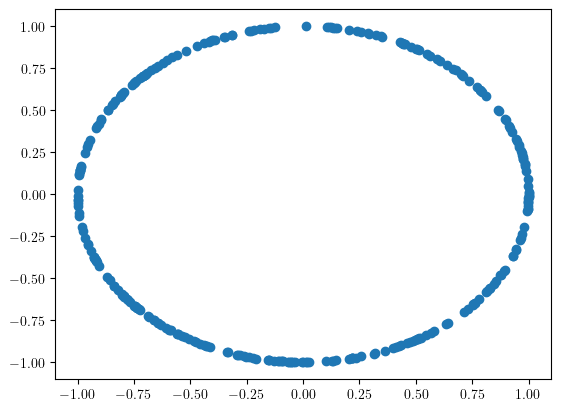

In [3]:
angles = np.random.uniform(0, 2*np.pi, size=300)

data = np.array([np.cos(angles), np.sin(angles)]).T

print(data.shape)

plt.scatter(data[:,0], data[:,1])

In [4]:
diagrams = ripser(data, maxdim=1, coeff=2)['dgms']

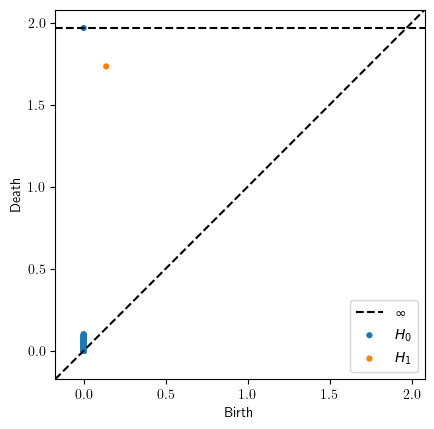

In [5]:
plot_diagrams(diagrams)

## Sphere

In [6]:
data = np.random.normal(size=(3,300))

data /= np.linalg.norm(data, axis=0)

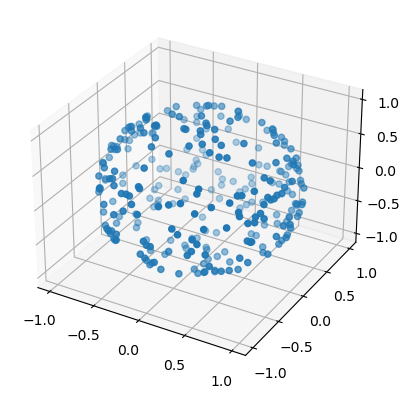

In [7]:
xs, ys, zs = data

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs, ys, zs)

plt.show()

In [8]:
diagrams = ripser(data.T, maxdim=2, coeff=2)['dgms']

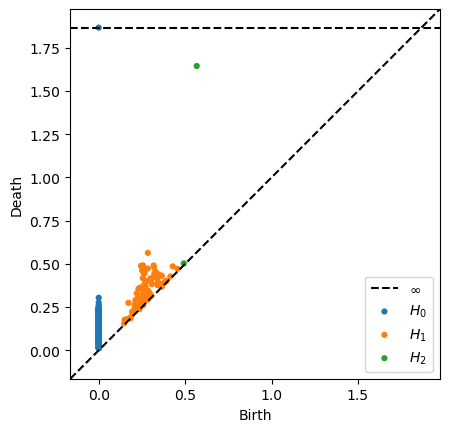

In [9]:
plot_diagrams(diagrams)

## Torus

In [10]:
n = 6_00

angles1 = np.random.uniform(0, 2*np.pi, size=n)
angles2 = np.random.uniform(0, 2*np.pi, size=n)

R, r = 4, 2

xs = (R + r*np.sin(angles1))*np.cos(angles2)
ys = (R + r*np.sin(angles1))*np.sin(angles2)
zs = r*np.cos(angles1)

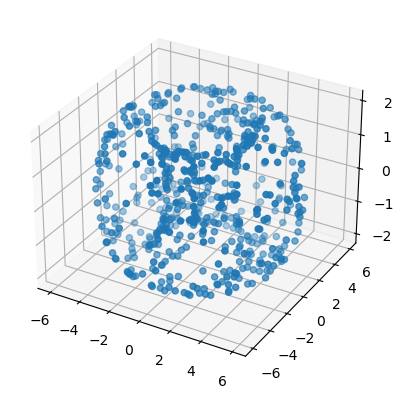

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs, ys, zs)

plt.show()

In [12]:
data = np.vstack((xs, ys, zs)).T

print(data.shape)

diagrams = ripser(data, maxdim=2, coeff=2)['dgms']

(600, 3)


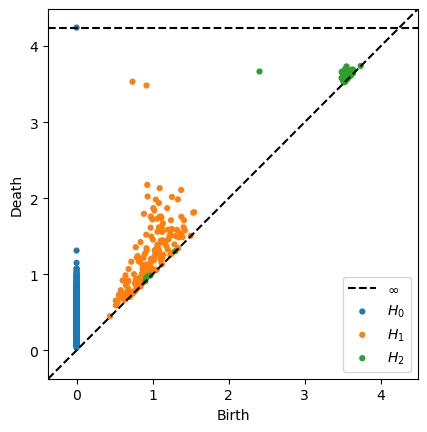

In [13]:
plot_diagrams(diagrams)

## Klein bottle in $\mathbb{R}^4$

In [14]:
def coords(u,v):
    a, b = 1, 1
    x = (a+b*np.cos(v))*np.cos(u)
    y = (a+b*np.cos(v))*np.sin(u)
    z = b*np.sin(v)*np.cos(u/2)
    t = b*np.sin(v)*np.sin(u/2)
    return np.array([x,y,z,t])

us = np.random.uniform(0,2*np.pi,5_00)
vs = np.random.uniform(0,2*np.pi,5_00)

data = np.array([coords(u,v) for u,v in zip(us,vs)])

In [15]:
diagrams2 = ripser(data, coeff=2, maxdim=2)['dgms']

In [16]:
diagrams3 = ripser(data, coeff=3, maxdim=2)['dgms']

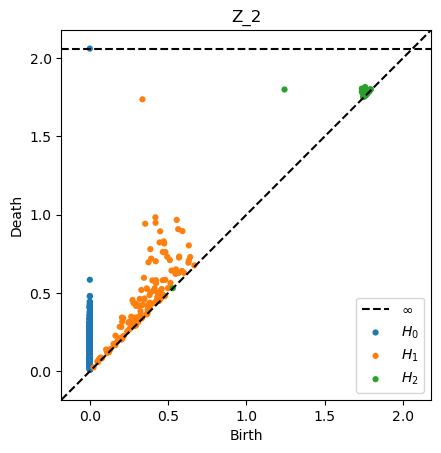

Text(0.5, 1.0, 'Z_3')

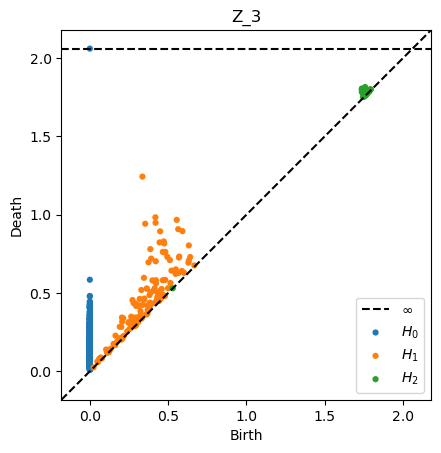

In [17]:
plot_diagrams(diagrams2)
plt.title("Z_2")

plt.show()

plot_diagrams(diagrams3)
plt.title("Z_3")

### So not always homology = "hole" !

Sometimes its due to [torsion](https://ripser.scikit-tda.org/en/latest/notebooks/Moebius%20Strip%20And%20The%20Field%20of%20Coefficients.html)!